# Lab 4: Working with 'real' data
#### Aidan Berres
#### Physics 434
#### 11/1/20

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

The columns are:

0. time (in gps seconds), 
1. Solar phase (deg) showing the position of the sun relative to the orbit, 
2. Earth longitude (deg) giving the position of the spacecraft relative to the ground, 
3. and particle counts.

## Problem #1

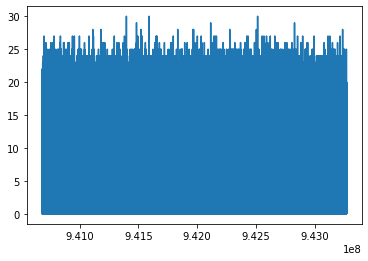

In [78]:
plt.plot(data[0], data[3])


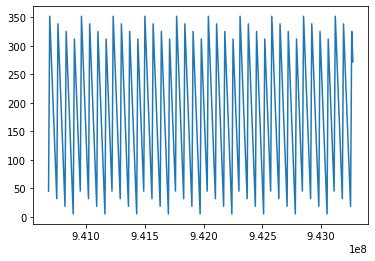

In [11]:
plt.plot(data[0][::100000], data[2][::100000])

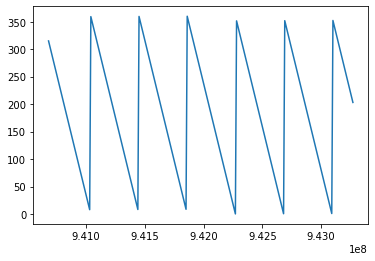

In [12]:
plt.plot(data[0][::100000], data[1][::100000])

## 2)

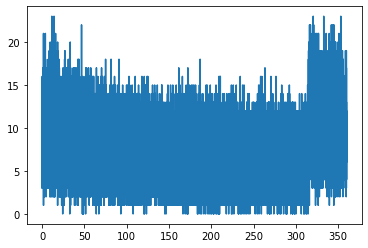

In [13]:
plt.plot(data[2][:54000],data[3][:54000])

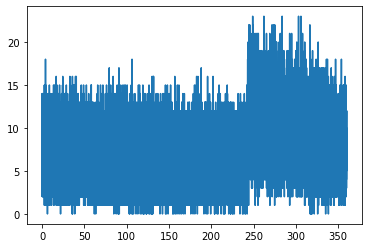

In [14]:
plt.plot(data[1][:54000],data[3][:54000])

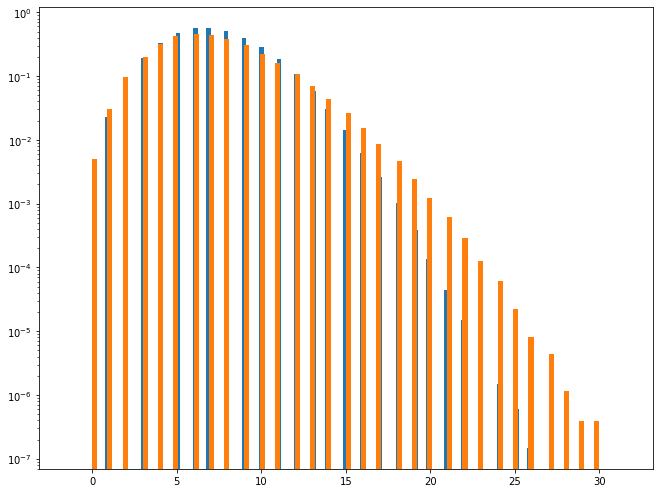

In [28]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu1=np.mean(data[3][::100000])
d1=stats.poisson.rvs(mu=mu1,size=len(data[2]))
plt.yscale('log')
ax.hist(d1,bins=100,density=True);
ax.hist(data[3],bins=100,density=True);
x1=np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],1000)
ax.plot(x1,stats.poisson.pmf(x1,mu=mu1)) # won't show up?

In [40]:
dfix1=[]
tf1=[]
dfix2=[]
tf2=[]
for i in range(len(data[1][:54000])):
    if data[2][i]<315:
        dfix1.append(data[2][i])
        tf1.append(data[3][i])
    else:
        dfix2.append(data[2][i])
        tf2.append(data[3][i])

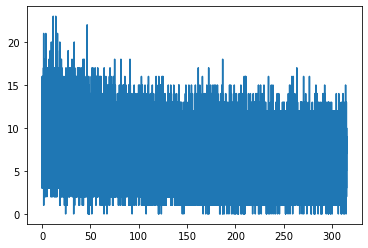

In [41]:
plt.plot(dfix1,tf1)

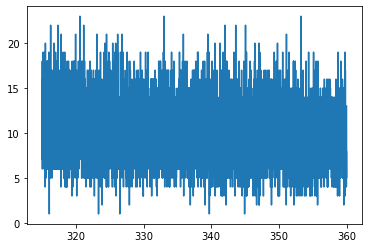

In [42]:
plt.plot(dfix2,tf2)

In [70]:
dfix3=[]
tf3=[]
dfix4=[]
tf4=[]
for i in range(len(data[1][:54000])):
    if data[1][i]<245:
        dfix3.append(data[1][i])
        tf3.append(data[3][i])
    else:
        dfix4.append(data[1][i])
        tf4.append(data[3][i])

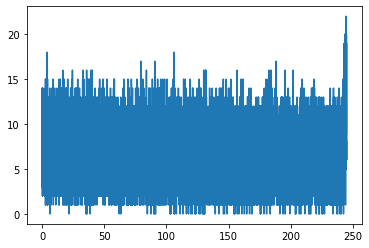

In [68]:
plt.plot(dfix3,tf3)

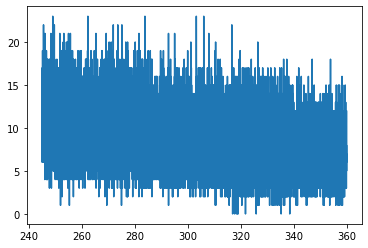

In [71]:
plt.plot(dfix4,tf4)

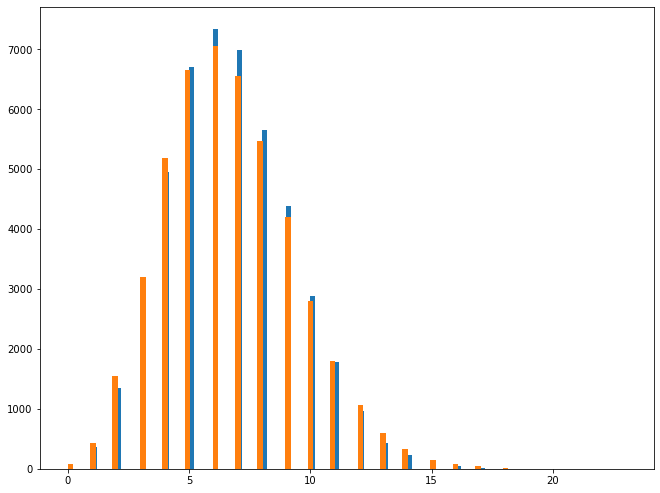

In [72]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf1)
c = stats.poisson.rvs(mu=mu2,size=len(tf1))
ax.hist(c,bins=100)
ax.hist(tf1,bins=100);

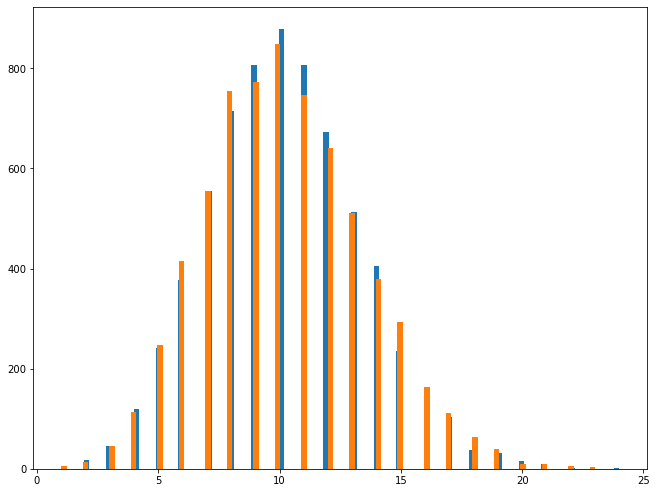

In [73]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu3=np.mean(tf2)
c = stats.poisson.rvs(mu=mu3,size=len(tf2))
ax.hist(c,bins=100)
ax.hist(tf2,bins=100);

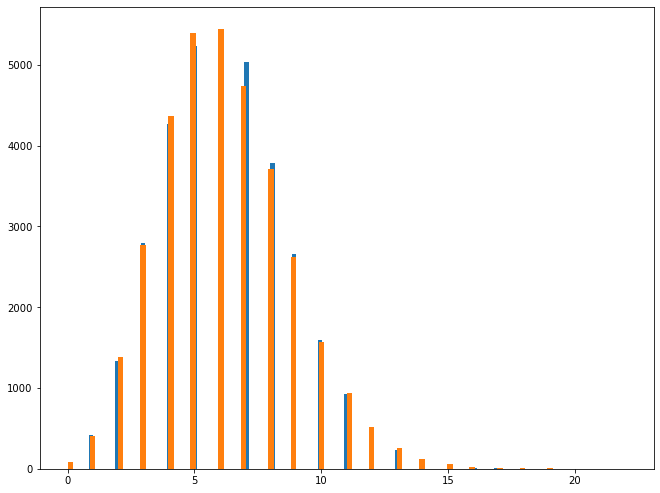

In [74]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf3)
c = stats.poisson.rvs(mu=mu2,size=len(tf3))
ax.hist(c,bins=100)
ax.hist(tf3,bins=100);

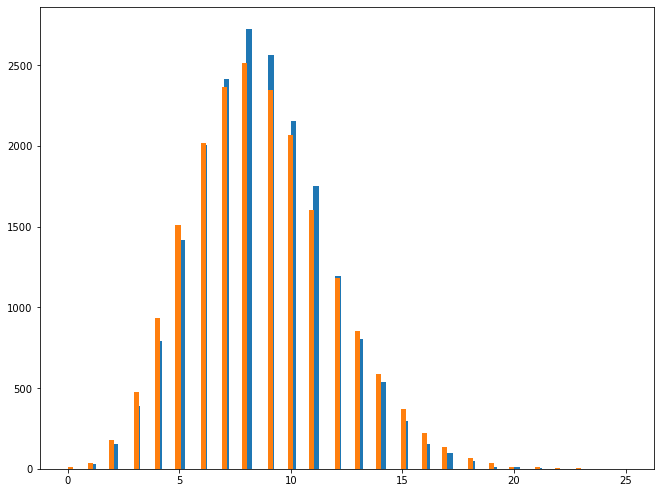

In [75]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf4)
c = stats.poisson.rvs(mu=mu2,size=len(tf4))
ax.hist(c,bins=100)
ax.hist(tf4,bins=100);

In [79]:
siggy5 = 1 - stats.norm.cdf(5)
p1 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf1))
p2 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf2))
print(p1,p2)

23.0 30.0


## Problem #2
## 1)

In [80]:
hf = h5py.File('images.h5', 'r') # import data
hf.keys()
data2 = np.array(hf.get('imagestack'))
hf.close() # close file

In [85]:
data2.shape

(200, 200, 10)

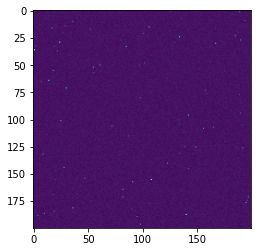

In [84]:
plt.imshow(data2[:,:,0])

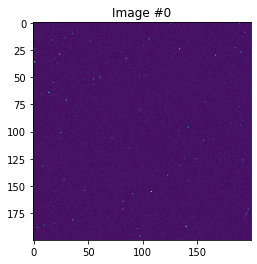

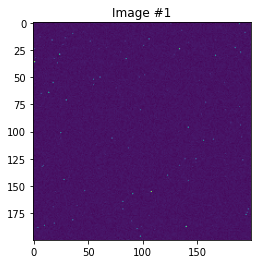

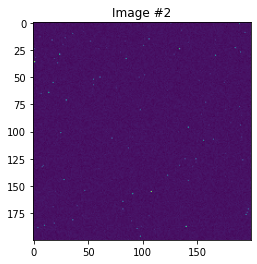

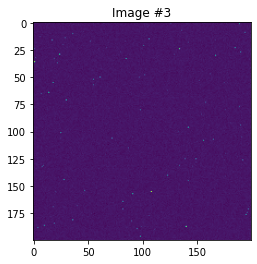

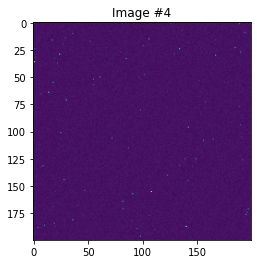

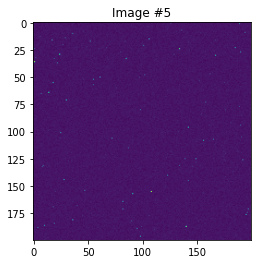

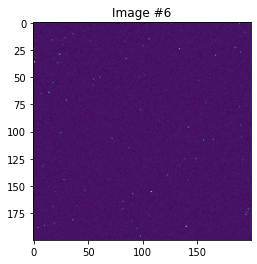

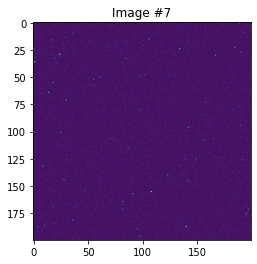

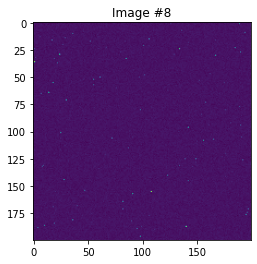

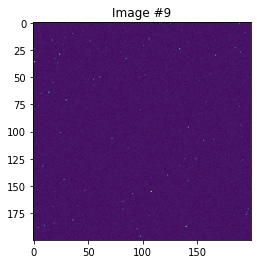

In [88]:
for i in range(10):
    plt.imshow(data2[:,:,i])
    plt.title(f'Image #{i}')
    plt.show()

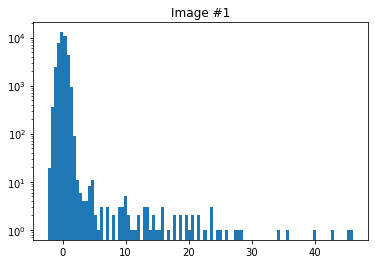

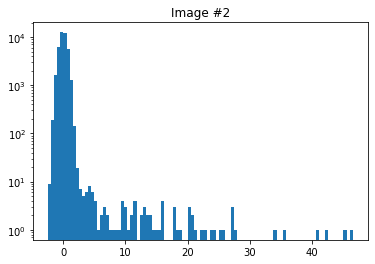

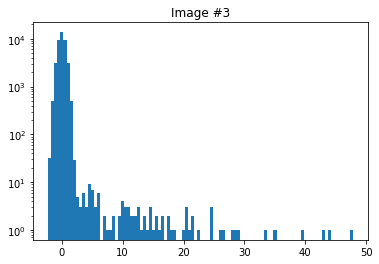

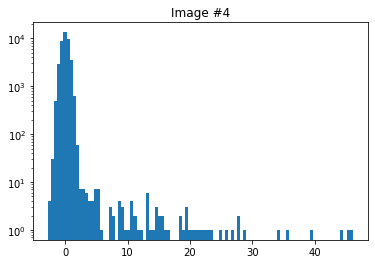

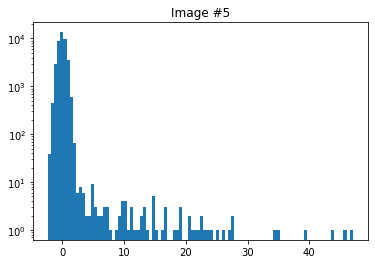

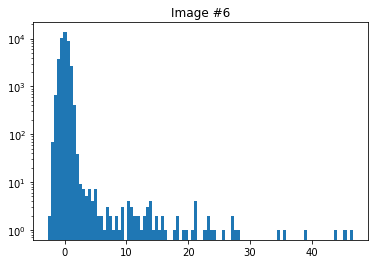

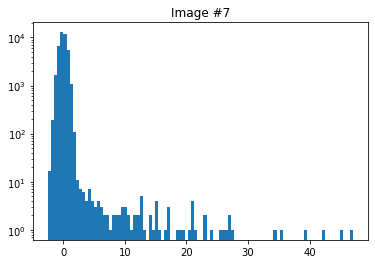

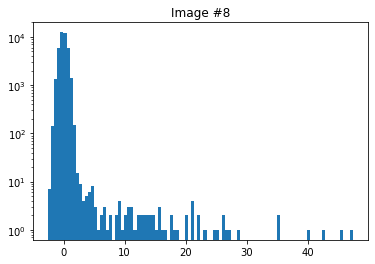

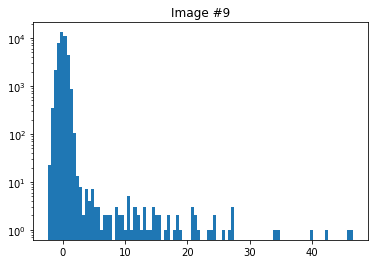

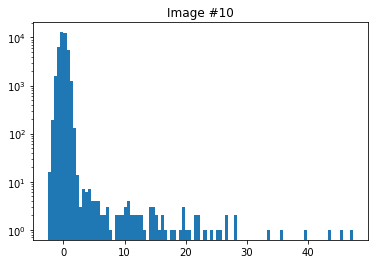

In [98]:
for i in range(10):
    pv=[]
    for j in range(200):
        pv.extend(data2[j,:,i].flatten())
    plt.hist(pv,bins=100)
    plt.title(f"Image #{i+1}")
    plt.yscale('log')
    plt.show()

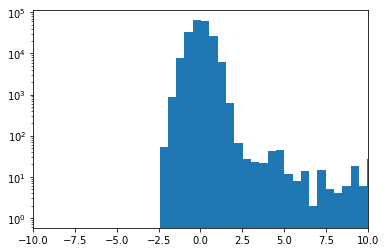

In [102]:
for j in range(200):
        pv.extend(data2[j,:,0].flatten())
plt.yscale('log')
plt.xlim(-10,10)
plt.hist(pv,bins=100);

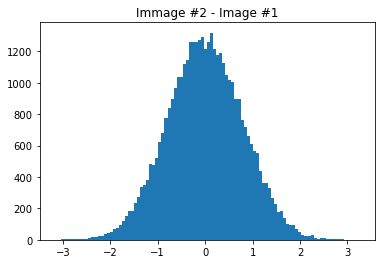

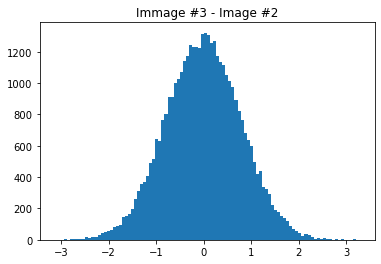

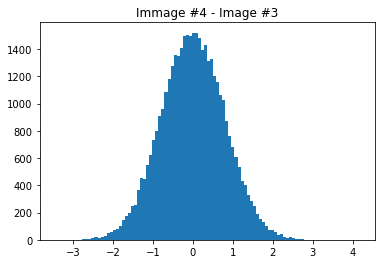

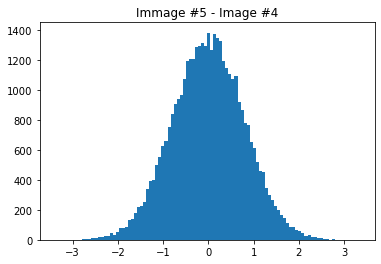

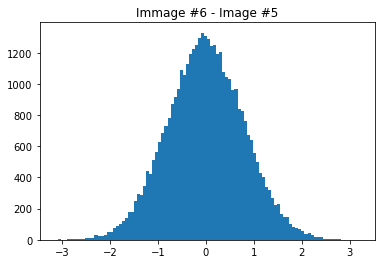

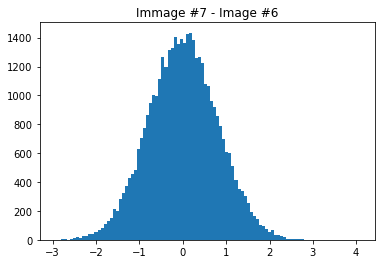

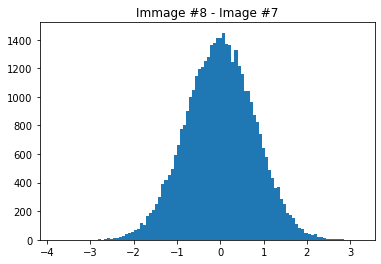

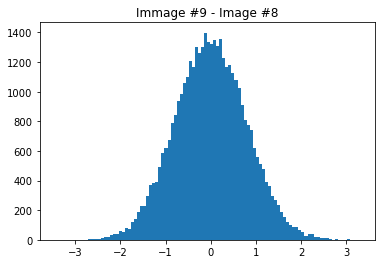

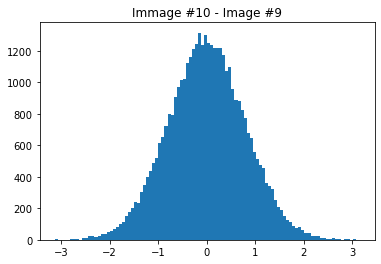

In [104]:
adiff=[]
for i in range(9):
    diff=[]
    bgp=[]
    for j in range(200):
        sub = data2[j,:,i] - data2[j,:,i+1]
        diff.extend(sub)
        bgp.append(sub)
    adiff.append(bgp)
    plt.title(f"Immage #{i+2} - Image #{i+1}")
    plt.hist(diff,100);
    plt.show();

In [108]:

background = np.zeros((200, 200))
adiff = np.array(adiff)

for i in range(9):
    for j in range(200):
        val = np.add(background[j, :], adiff[i, j, :])
        avg = np.true_divide(val, 9)
        background[j] = avg
        
background_pixels = []
for i in range(200):
    background_pixels.extend(background[:, i])

In [109]:
low_bound = 1 - stats.norm.cdf(5)

sum = 0
for i in range(len(background_pixels)):
    if (sum != low_bound):
        sum = sum + background_pixels[i]  
print(np.abs(sum) / 4)

3.0475030107852925
